In [1]:
# needed functions and libraries
import pandas as pd
import seaborn as sns
from pathlib import Path
import signature_functions as sf

# inputs

In [2]:
config_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT/configs.json'
configs = sf.config_reader(config_path)
report_dir = configs['results_folder']
meta_file_path = configs['metadata_annotation']
meta_df = pd.read_excel(meta_file_path)
sf.entity_subtypes = 'code_oncotree'
path_to_file = f'{report_dir}/kinase_results/kinase_scores.tsv'

# signature by t_test
intensity_file = pd.read_csv(path_to_file,sep = '\t').set_index('PSP Kinases')

patients_interest =    ['I063-024-2M1-P1',
                        'H021-WJQEW5-T1',
                        'H021-DWG1JA-T1',
                        'H021-8DSJKN-T1-Q1',
                        'H021-WFP9B3-M1',
                        'H021-DGKVVG-T1',
                        'H021-VTEG9B-T1',
                        'I007-126-1T1-P1',
                        'I049-022-XT1-P1',
                        'H021-N8E2BK-M1',
                        'H021-YT3YPX-T1-Q1',
                        'H021-VDA4RJ-M1',
                        'H021-6Q4GQN-M2',
                        'I012-003-1T1-P1',
                        'I034-052-222996',
                        'H021-5WKVYW-T3',
                        'I027-023-0T1-P1']
meta_df[sf.entity_subtypes][meta_df['Sample name'].isin(patients_interest)] = 'NF1--EGFR++'
list_of_interested_entitiese = ['NF1--EGFR++']


/tmp/ipykernel_338891/2889669311.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df[sf.entity_subtypes][meta_df['Sample name'].isin(patients_interest)] = 'NF1--EGFR++'


In [3]:
def signature_pipeline(entity):
    # Preprocessing
    
    input_df,list_proteins = sf.prepareDataframeforTest(
                                                        intensity_file,
                                                        meta=meta_df,
                                                        minimum_patients_per_entity = 8,
                                                        protein_expressed_in_at_least_percent = 70)

    # univariate Analysis with Cross_validation
    ROC_univariate_df = sf.univariate_analysis_with_CV_for_all_proteins(input_df,
                                                    list_proteins,
                                                    entity,
                                                    K_folds = 5,
                                                    repeats = 1,
                                                    threshold = 0.7
                                                    )

    # T_test
    first_t_test_result_df = sf.one_vs_all_t_test(
                            input_df,
                            list_proteins,
                            entity,
                            sf.entity_subtypes)
    t_test_univariate_df = first_t_test_result_df.merge(ROC_univariate_df,right_on='names',left_on='Gene Names')
    t_test_univariate_df = t_test_univariate_df.rename(columns={'Gene Names':'kinase'})
    t_test_univariate_df.to_excel(Path(report_dir)/f'kinase_signatures_{entity}vs_all.xlsx')
    print(f'{entity}_Finished')
    return 'fnished'

In [4]:
[signature_pipeline(x) for x in list_of_interested_entitiese]

NF1--EGFR++_Finished


/home/amir/topas/Topas_paper_scripts/scripts_for_papers/MTB_scripts/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'


['fnished']

T_test Cross_validaton

/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'
/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'
/ho

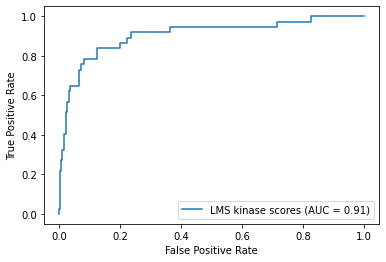

0.9057726204465335

In [4]:
input_df,list_proteins = sf.prepareDataframeforTest(
                                                intensity_file,
                                                meta=meta_df,
                                                minimum_patients_per_entity = 8,
                                                protein_expressed_in_at_least_percent = 70)
CV_reseults = sf.cross_validation_for_one_vs_all_t_test(
                                         input_df,
                                         intensity_file,
                                         meta_df,
                                         "LMS",
                                         list_proteins,
                                         k_folds = 5,
                                         num_repeats = 1,
                                         p_value_cutoff = None,
                                         fdr_cutoff = .01,
                                         average_difference_twogroups = .5) 
sf.ROC_curve_analysis(CV_reseults.labels,CV_reseults.scores,curve_title='LMS kinase scores')